In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import subprocess
import os

import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go
import plotly


mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

In [4]:
data_path='/content/drive/MyDrive/dataset_JH/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [16]:
time_idx=pd_raw.columns[4:]

df_plot = pd.DataFrame({       ##as a column to a new dataframe
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


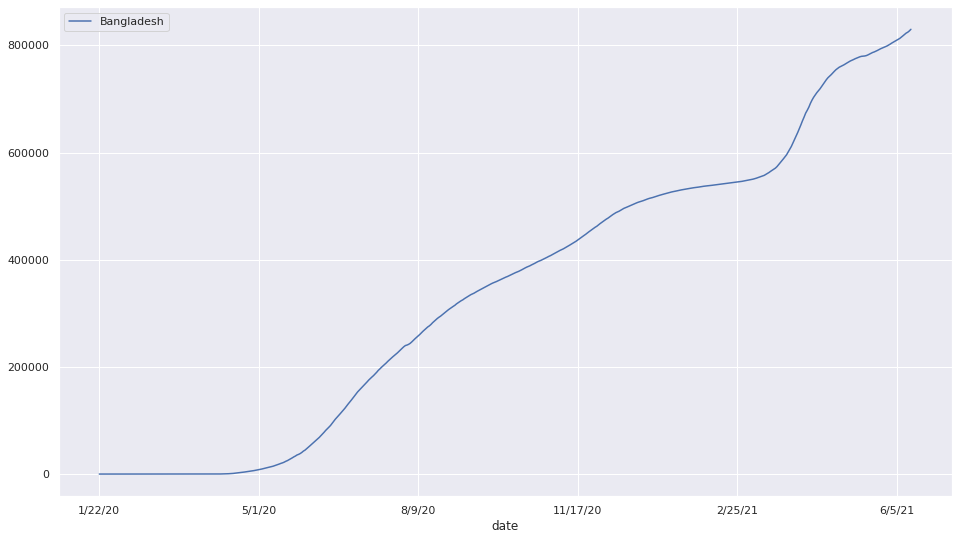

In [6]:
country_list=['Bangladesh' ] 
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0)) ## 'each' country gets a column

df_plot.set_index('date').plot()


In [7]:
df_plot.head()

,date,Bangladesh
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [8]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df_plot.head()

,date,Bangladesh
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [10]:
df_plot.to_csv('/content/drive/MyDrive/Final/database_bd/COVID_BD_confirmed.csv',sep=';',index=False)

In [11]:
df_plot.sort_values('date',ascending=True).head()

,date,Bangladesh
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [12]:
df_analyse=pd.read_csv('/content/drive/MyDrive/Final/database_bd/COVID_BD_confirmed.csv',sep=';',
                       parse_dates=[0])  

df_analyse.sort_values('date',ascending=True).tail()

,date,Bangladesh
505,2021-06-10,820395
506,2021-06-11,822849
507,2021-06-12,824486
508,2021-06-13,826922
509,2021-06-14,829972


In [13]:
from sklearn import linear_model
from scipy import signal
country_list=df_analyse.columns[1:]
## filter data 
##increase the precision of the data without distorting signal tendency
for each in country_list:
    df_analyse[each+'_filter']=signal.savgol_filter(df_analyse[each],  
                           5, # window size used for filtering
                           1) # order of fitted polynomial


In [14]:
df_analyse.tail()

,date,Bangladesh,Bangladesh_filter
505,2021-06-10,820395,820166.2
506,2021-06-11,822849,822494.2
507,2021-06-12,824486,824924.8
508,2021-06-13,826922,827247.5
509,2021-06-14,829972,829570.2


In [15]:
df_analyse.to_csv('/content/drive/MyDrive/Final/database_bd/COVID_BD_confirmed_filtered.csv',sep=';',index=False)